<a href="https://colab.research.google.com/github/loulyp/Loan-Default-Prediction/blob/main/ML_Project_completed_LastEdit(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ARTI 406 - Machine Learning: Loan Default Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Loan_default.csv to Loan_default.csv


# Data **Preprocessing**

In [ ]:
df=pd.read_csv('Loan_default.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
df.shape

(255347, 18)

In [ ]:
df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


## **Statistical** **Analysis** **of** **the** **dataset**

In [ ]:
stats= df.describe().T
stats['median'] = df.median(numeric_only=True)
print(stats[['mean', 'median', 'std', 'max', 'min']])

                         mean     median           std       max      min
Age                 43.498306      43.00     14.990258      69.0     18.0
Income           82499.304597   82466.00  38963.013729  149999.0  15000.0
LoanAmount      127578.865512  127556.00  70840.706142  249999.0   5000.0
CreditScore        574.264346     574.00    158.903867     849.0    300.0
MonthsEmployed      59.541976      60.00     34.643376     119.0      0.0
NumCreditLines       2.501036       2.00      1.117018       4.0      1.0
InterestRate        13.492773      13.46      6.636443      25.0      2.0
LoanTerm            36.025894      36.00     16.969330      60.0     12.0
DTIRatio             0.500212       0.50      0.230917       0.9      0.1
Default              0.116128       0.00      0.320379       1.0      0.0


In [ ]:
corr = df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm']].corr()
corr

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000


**Understanding distribution of various numerical columns**

In [ ]:
df['LoanAmount'].describe()

count    255347.000000
mean     127578.865512
std       70840.706142
min        5000.000000
25%       66156.000000
50%      127556.000000
75%      188985.000000
max      249999.000000
Name: LoanAmount, dtype: float64

In [ ]:
df['MonthsEmployed'].describe()

count    255347.000000
mean         59.541976
std          34.643376
min           0.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: MonthsEmployed, dtype: float64

In [ ]:
df['DTIRatio'].describe()

count    255347.000000
mean          0.500212
std           0.230917
min           0.100000
25%           0.300000
50%           0.500000
75%           0.700000
max           0.900000
Name: DTIRatio, dtype: float64

## check for missing values

In [ ]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

**There is no null values in any columns**

## Check for Outliers

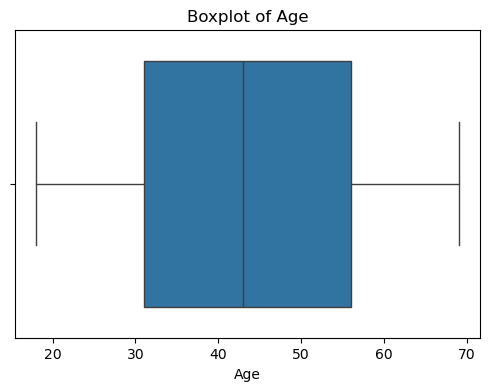

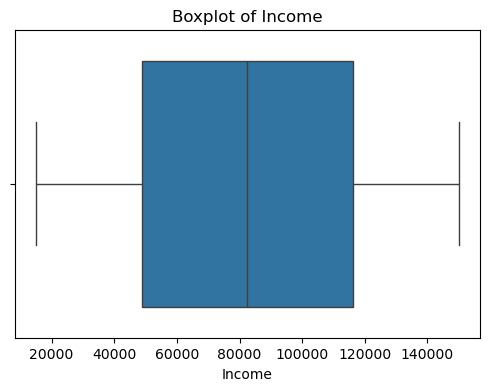

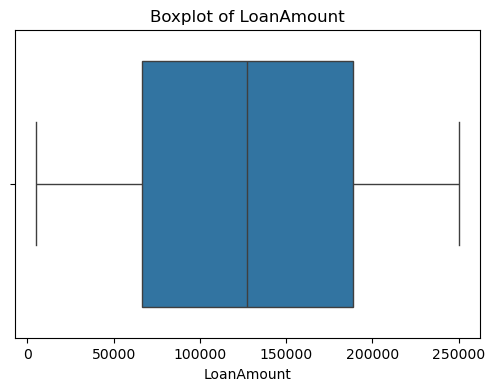

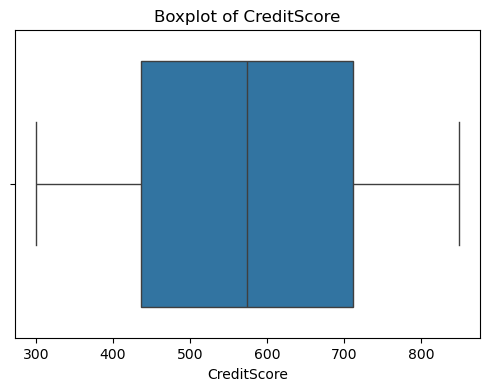

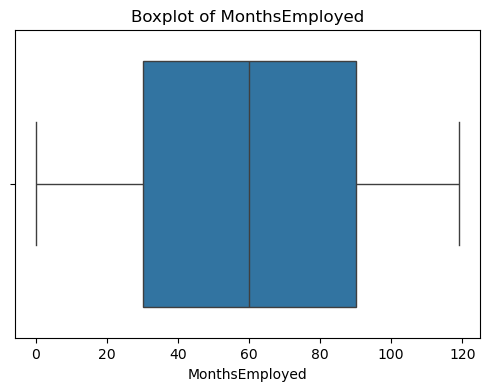

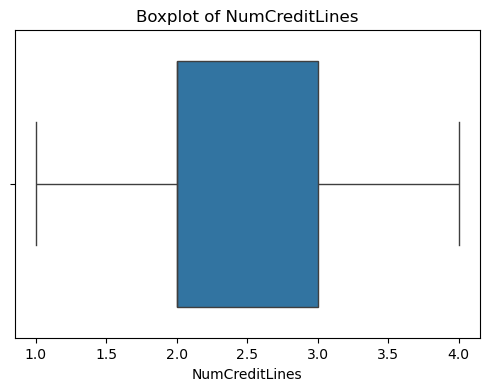

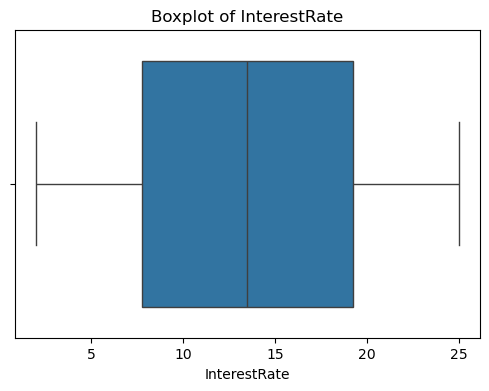

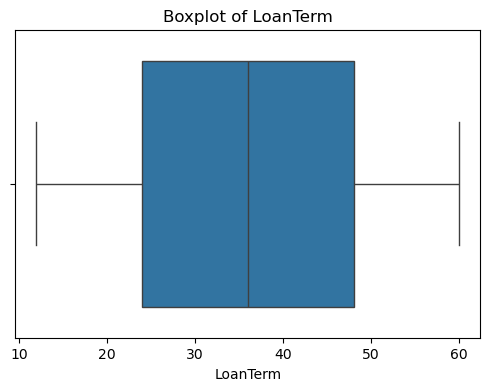

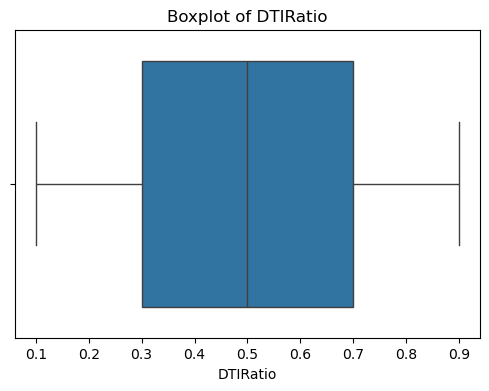

In [ ]:
col=['Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','DTIRatio']
for c in col:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x= df[c])
  plt.title(f'Boxplot of {c}')
  plt.show()

## Explanatory Data Analysis

## Identifying Credit Score ranges

In [ ]:
df['CreditScore'].describe()

count    255347.000000
mean        574.264346
std         158.903867
min         300.000000
25%         437.000000
50%         574.000000
75%         712.000000
max         849.000000
Name: CreditScore, dtype: float64

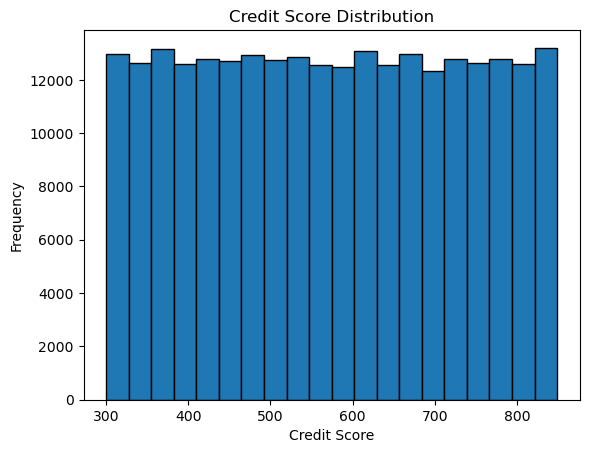

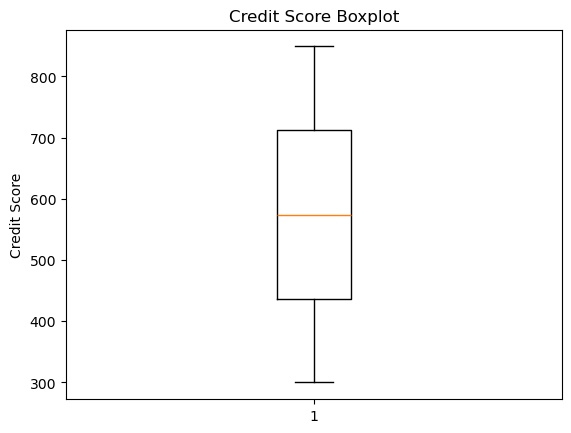

In [ ]:
# Plot Histogram
plt.hist(df['CreditScore'], bins=20, edgecolor='black')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# Boxplot for visualizing quartiles and outliers
plt.boxplot(df['CreditScore'])
plt.title('Credit Score Boxplot')
plt.ylabel('Credit Score')
plt.show()


## **Binning**

### Create bins of credit score

In [ ]:
bins = [300,437,574,712,849]
bin_labels = ['Very Poor', 'Below Average', 'Average', 'Good']

df['CreditScoreBin']  = pd.cut(df['CreditScore'], bins=bins, labels=bin_labels,right=True)

default_rate_by_bin = df.groupby('CreditScoreBin')['Default'].mean()*100

print(default_rate_by_bin)


CreditScoreBin
Very Poor        13.037263
Below Average    11.894425
Average          11.290222
Good             10.197141
Name: Default, dtype: float64


C:\Users\leena\AppData\Local\Temp\ipykernel_4644\3522914662.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_by_bin = df.groupby('CreditScoreBin')['Default'].mean()*100


### Binnging for other values And Creating subplots for categorical features


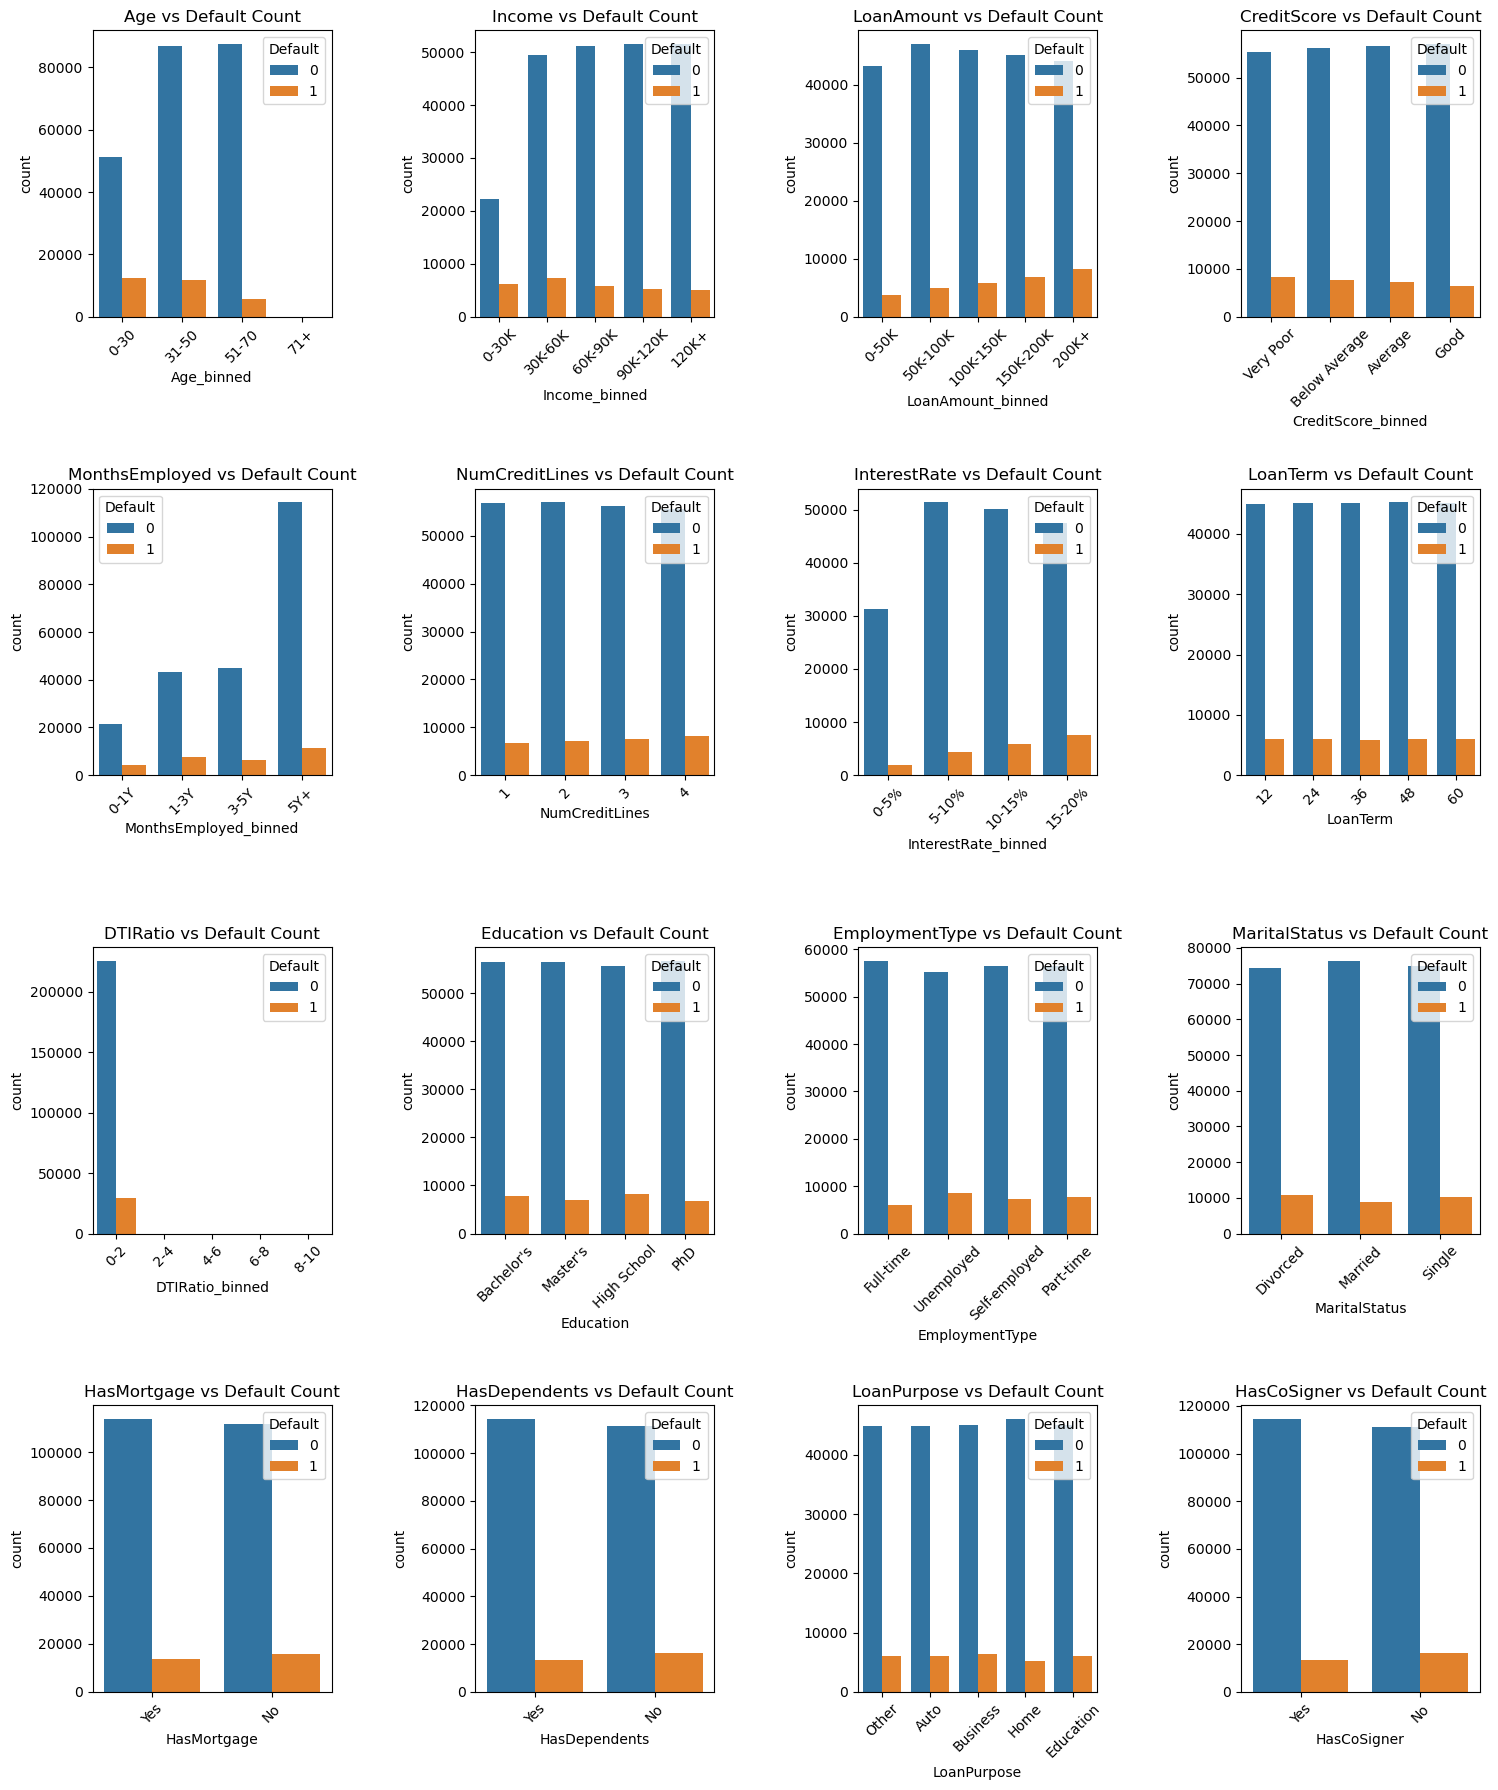

In [ ]:
# Plotting setup
plt.figure(figsize=(15, 18))

# Define numerical columns to bin
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Create subplots for numerical features with more appropriate binning
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)  # Adjusted grid layout to 4x4
    # Bin the numerical features for clarity
    if feature == 'Age':
        bins = [0, 30, 50, 70, 100]
        labels = ['0-30', '31-50', '51-70', '71+']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'Income':
        bins = [0, 30000, 60000, 90000, 120000, 150000]
        labels = ['0-30K', '30K-60K', '60K-90K', '90K-120K', '120K+']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'LoanAmount':
        bins = [0, 50000, 100000, 150000, 200000, 250000]
        labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K+']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'CreditScore':
        bins = [300,437,574,712,849]
        labels = ['Very Poor', 'Below Average', 'Average', 'Good']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'MonthsEmployed':
        bins = [0, 12, 36, 60, 120]
        labels = ['0-1Y', '1-3Y', '3-5Y', '5Y+']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'DTIRatio':
        bins = [0, 2, 4, 6, 8, 10]
        labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    elif feature == 'InterestRate':
        bins = [0, 5, 10, 15, 20]
        labels = ['0-5%', '5-10%', '10-15%', '15-20%']
        df[feature + '_binned'] = pd.cut(df[feature], bins=bins, labels=labels)
        sns.countplot(x=feature + '_binned', hue='Default', data=df)
    else:
        sns.countplot(x=feature, hue='Default', data=df)
    plt.title(f'{feature} vs Default Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Create subplots for categorical features
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

for i, feature in enumerate(categorical_features, len(numerical_features) + 1):
    plt.subplot(4, 4, i)  # Continue the grid layout with the same adjusted size (4x4)
    sns.countplot(x=feature, hue='Default', data=df)
    plt.title(f'{feature} vs Default Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to add space between plots
plt.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.show()

**Interpretation**

1. As loan amount increases, the cases for default increases.
2. As credit score improves, count for default decreases.
3. In employment type, unemployed people have highest number of default cases.
4. As interest rate increases, count for default also increases.
5. As count of no. of credit lines increases, default count increases.

## **More Visualisation Of The Dataset Features**

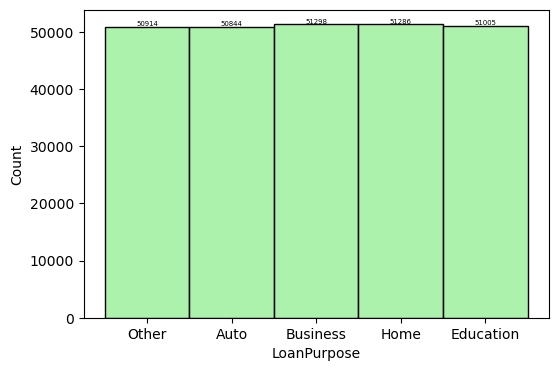

In [ ]:
plt.figure(figsize=(6,4))
chart1=sns.histplot(data=df, x='LoanPurpose', color='LightGreen', bins=5)
chart1.bar_label(chart1.containers[0],size=5)
plt.show()

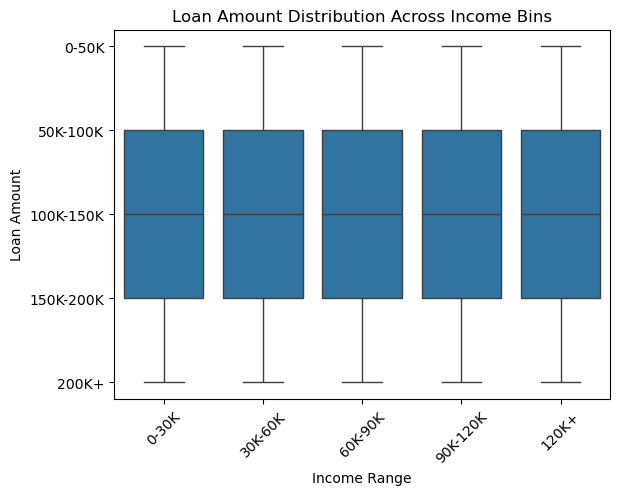

In [ ]:
sns.boxplot(x=df['Income_binned'], y=df['LoanAmount_binned'] , data=df)

plt.title('Loan Amount Distribution Across Income Bins')
plt.xlabel('Income Range')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

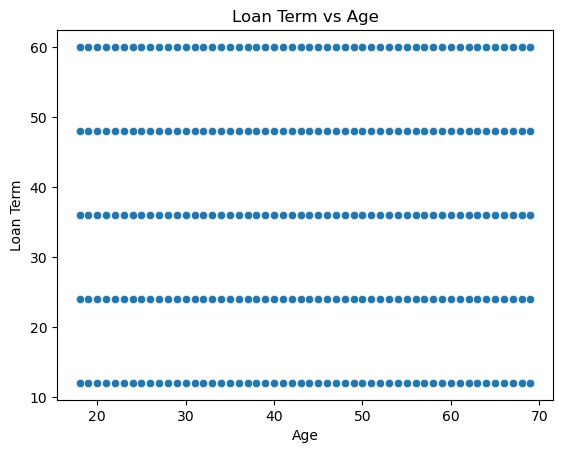

In [ ]:
sns.scatterplot(data=df, x='Age', y='LoanTerm')
plt.title('Loan Term vs Age')
plt.xlabel('Age')
plt.ylabel('Loan Term')
plt.show()

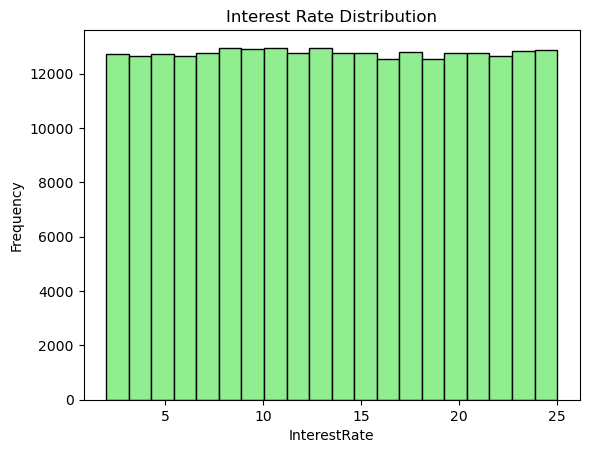

In [ ]:
plt.hist(df['InterestRate'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Interest Rate Distribution')
plt.xlabel('InterestRate')
plt.ylabel('Frequency')
plt.show()

## Dropping binned columns after using them only for data exploration and feature relationship analysis.

In [ ]:
# Drop all columns that end with '_binned' as created in above code
df = df.drop(columns=[col for col in df.columns if col.endswith('_binned')])

df = df.drop(columns =['CreditScoreBin','LoanID'])


## Finding top features contributing to default

## Finding Correlation

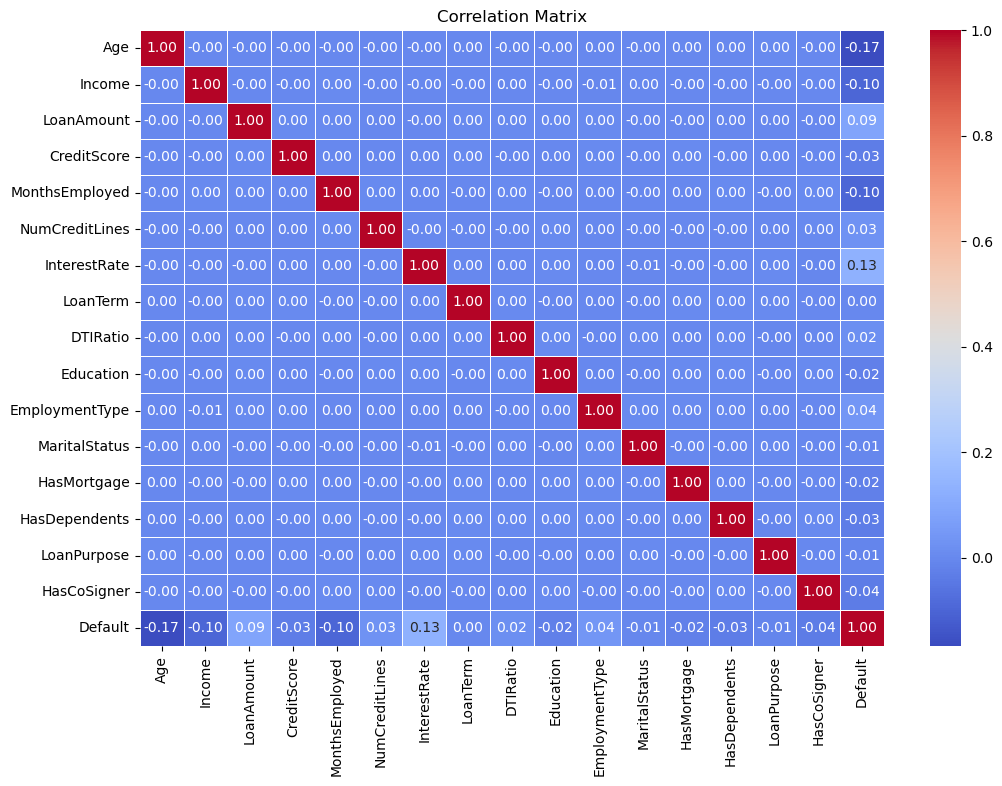

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
                       'HasDependents', 'LoanPurpose', 'HasCoSigner']

encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])


correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Since there is no strong correlation of default with any other variable we will use **feature selection** using **random forest**. correlation matrix does not show high absolute correlations among the variables, it means pairwise linear relationships between variables are not significant.

## Feature Selection using Random Forest

Top 10 Features Contributing to Default Prediction:
           Feature  Importance
1           Income    0.131455
6     InterestRate    0.125897
2       LoanAmount    0.120491
3      CreditScore    0.103909
0              Age    0.099757
4   MonthsEmployed    0.098170
8         DTIRatio    0.090078
7         LoanTerm    0.038423
14     LoanPurpose    0.037919
5   NumCreditLines    0.031319


<ipython-input-8-f9660543a296>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature', data=features_df.head(10),palette='viridis')


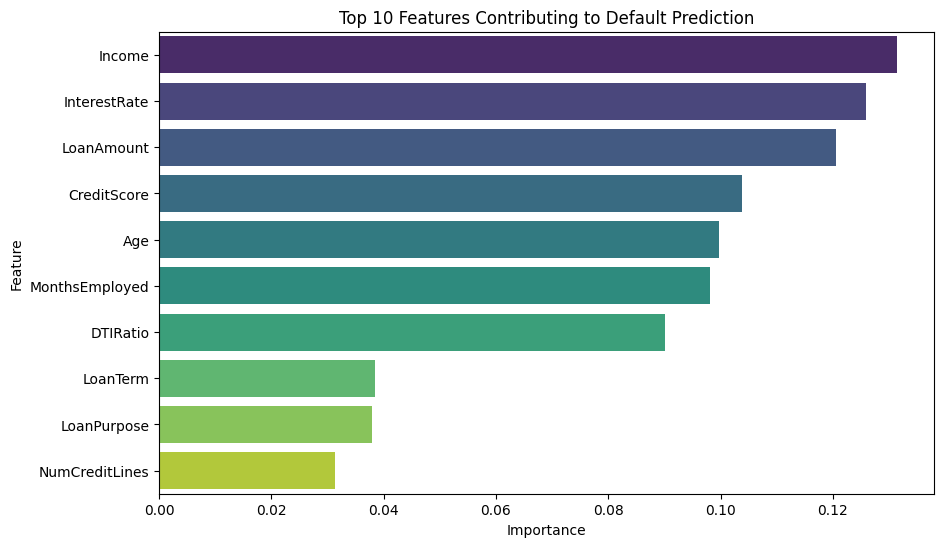

In [ ]:
#Separate features and target variable
X = df.drop('Default', axis=1)
y = df['Default']


from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(random_state=42)
rf.fit(X,y)

feature_importances = rf.feature_importances_

features_df = pd.DataFrame({
     'Feature': X.columns,
    'Importance': feature_importances
})

features_df = features_df.sort_values(by='Importance', ascending=False)

print("Top 10 Features Contributing to Default Prediction:")
print(features_df.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature', data=features_df.head(10),palette='viridis')
plt.title('Top 10 Features Contributing to Default Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Note: The feature importance analysis was conducted to identify the most influential variables in our dataset. While Income and Interest Rate emerged as top predictors, we will retain all available features, including other social factors. Our aim is to contribute to a more holistic understanding of default prediction, considering not only financial aspects but also the potential influence of other social features present in the data.


## Examining the class distribution to determine if it is balanced or imbalanced

In [ ]:
# Count of default and non-default cases out of total cases

default_count = df['Default'].sum()
non_default_count = len(df) - default_count

default_percentage = round(default_count/df['Default'].count()*100,2)
non_default_percentage = round(non_default_count/df['Default'].count()*100,2)


print(f"Total Default cases: {default_count}")
print(f"Total non_default cases: {non_default_count}")
print(f"Default percentage:{default_percentage}%")
print(f"Non Default percentage:{non_default_percentage}%")


Total Default cases: 29653
Total non_default cases: 225694
Default percentage:11.61%
Non Default percentage:88.39%


Since the data has class **imbalance** we will use sampling techniques to balance the dataset like (SMOTE)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
from scipy import stats
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PolynomialFeatures
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.pipeline import Pipeline as pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,make_scorer
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import time
import numpy as np
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score, \
                            mean_squared_error, \
                            mean_absolute_error
from scipy.stats import uniform, poisson

In [ ]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


##**taking sample of 20,000 from the data set**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# taking a sample from the dataset
sample_size = 20000

# Sample the DataFrame
df_sampled = df.sample(n=sample_size, random_state=42)


# **Encoding using Cat function and applaying sampling techniques to balance the dataset**

In [ ]:
num = df_sampled.select_dtypes(['int','float'])

In [ ]:
def ColumnTrans(cat):
    for x in cat.columns:
        data = cat[x]
        unique = data.unique()
        maps = {value:index for index,value in enumerate(unique)}
        cat[x] = cat[x].map(maps)
    return cat

In [ ]:
cat = df_sampled.select_dtypes('object')
cat = ColumnTrans(cat)
df = pd.concat([num,cat],axis=1)

In [ ]:
x1 = df.drop(columns='Default')
y1 = df.Default

In [ ]:
ros = RandomOverSampler()
rus = RandomUnderSampler()
smote = SMOTE()

In [ ]:
x2,y2 = ros.fit_resample(x1,y1)
x3,y3 = smote.fit_resample(x2,y2)
x,y = rus.fit_resample(x3,y3)

In [ ]:
#split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### basic statistics of each split

In [ ]:
#check number of rows in each spilt
print("Train set rows:", len(x_train))
print("Test set rows:",len(x_test))
stat_train=x_train.describe().T
stat_test=x_test.describe().T

print(stat_train[['count', 'mean','std', 'min','max']],'\n')
print(stat_test[['count', 'mean','std', 'min','max']])

Train set rows: 28363
Test set rows: 7091
                  count           mean           std      min       max
Age             28363.0      40.486620     14.985690     18.0      69.0
Income          28363.0   77588.732222  39950.362563  15000.0  149993.0
LoanAmount      28363.0  135106.326658  70336.135116   5034.0  249957.0
CreditScore     28363.0     570.481613    159.457143    300.0     849.0
MonthsEmployed  28363.0      55.658217     34.572737      0.0     119.0
NumCreditLines  28363.0       2.528259      1.117902      1.0       4.0
InterestRate    28363.0      14.628716      6.614217      2.0      25.0
LoanTerm        28363.0      36.062617     17.106032     12.0      60.0
DTIRatio        28363.0       0.508253      0.230684      0.1       0.9
Education       28363.0       1.441737      1.109518      0.0       3.0
EmploymentType  28363.0       1.548426      1.113764      0.0       3.0
MaritalStatus   28363.0       0.984910      0.828958      0.0       2.0
HasMortgage     28363.

# **Checking class distribution to assess balance after applying SMOTE**

In [ ]:
import pandas as pd

# Assuming 'x' contains the features and 'y' contains the balanced 'Default' column
df_balanced = pd.DataFrame(x, columns=df.drop(columns=['Default']).columns) # Assuming original 'df' column names
df_balanced['Default'] = y

# Now defaults in df_balanced
default_counts_balanced = df_balanced['Default'].value_counts()
print("Counts of Default and Non-Default after balancing (in df_balanced):")
print(default_counts_balanced)

default_percentages_balanced = df_balanced['Default'].value_counts(normalize=True) * 100
print("\nPercentage distribution of Default and Non-Default after balancing (in df_balanced):")
print(default_percentages_balanced)

Counts of Default and Non-Default after balancing (in df_balanced):
Default
0    17727
1    17727
Name: count, dtype: int64

Percentage distribution of Default and Non-Default after balancing (in df_balanced):
Default
0    50.0
1    50.0
Name: proportion, dtype: float64


Since the data is now balanced, we can proceed with modeling

#**Start Modelling**

we will use **GridSearchCV** and **hyperparameter** **tuning** to find the best model parameters and improve performance.


## **Random** **Forest**

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

#note: no need to run this cell again
#output: RandomForestClassifier(max_depth=30)

In [ ]:
model = RandomForestClassifier(max_depth=30)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

### Evaluation of Model Performance


Random Forest Metrics:
Accuracy: 0.9925
Precision: 0.9865
Recall: 0.9989
F1 Score: 0.9926
Confusion Matrix:
[[3470   49]
 [   4 3568]]
AUC: 0.9994


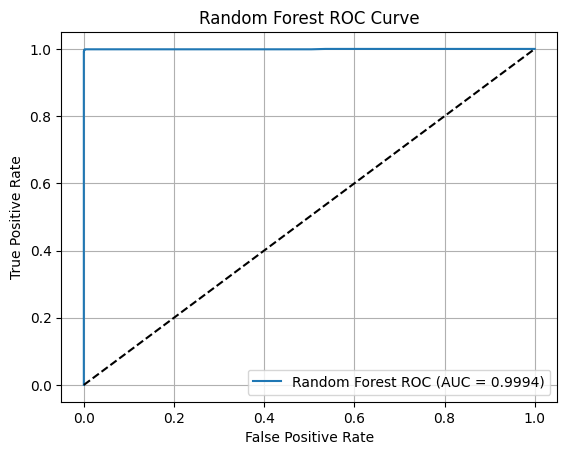

In [ ]:
# Evaluation metrics
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, prediction)

# ROC Curve & AUC
rf_proba = model.predict_proba(x_test)[:, 1]  # using 'model' instead of 'rf_model'
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Print Metrics
print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm_rf)
print(f"AUC: {roc_auc_rf:.4f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest ROC (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

results:
Accuracy (99.25%): About 99.25% of total predictions were correct.

Precision (98.65%): Of all the instances predicted as positive, 98.65% were actually positive.

Recall (99.89%): The model caught almost all of the actual positive cases

F1 Score (99.26%): the harmonic mean of precision and recall — a balanced metric


ROC Curve & AUC:
The ROC curve shows the tradeoff between true positive rate and false positive rate.
AUC = 0.9994 which means the model is excellent at separating the classes.

###Scatter Plot of Predicted vs. Actual Values for Binary Classification.

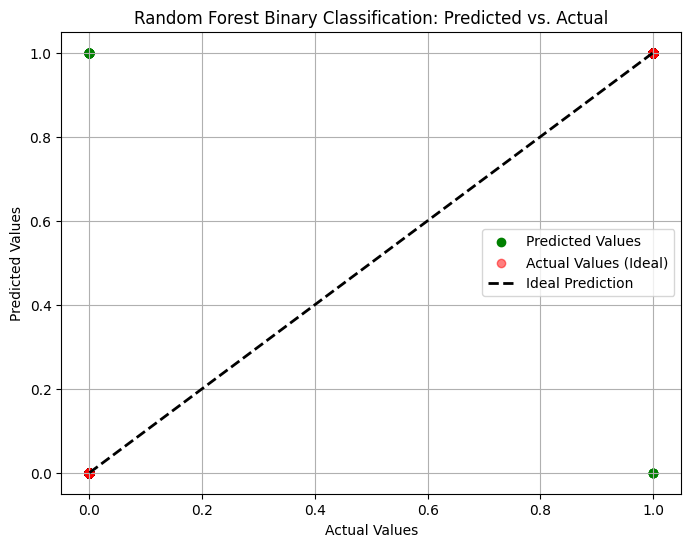

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction, color='green', label='Predicted Values')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual Values (Ideal)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Binary Classification: Predicted vs. Actual')
plt.grid(True)
plt.legend()

# Add a diagonal line for ideal predictions
min_val = min(min(y_test), min(prediction))
max_val = max(max(y_test), max(prediction))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Ideal Prediction')
plt.legend()

plt.show()

### Scatter Plot to show the relationship between max_depth and Accuracy.

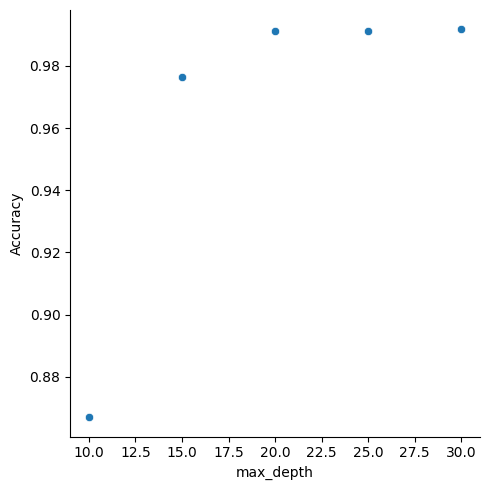

In [ ]:
# lists of max_depth values crossponding to its accuracy
max_depth_values = [10,15, 20,25, 30]
accuracy_scores = [0.8670,0.9762, 0.9910,0.9913, 0.9917]

# Creating a Pandas DataFrame
accuracy_df = pd.DataFrame({'max_depth': max_depth_values, 'Accuracy': accuracy_scores})

# use the accuracy_df DataFrame with sns.relplot()
sns.relplot(x="max_depth", y="Accuracy", data=accuracy_df, kind="scatter");

##**Decision Tree**

In [ ]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': range(1,35),
}
dtree =  DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)
grid_search.fit( x_train, y_train)
best_dtree = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred = best_dtree.predict(x_test)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

#note: no need to run this cell again
#output: Fitting 5 folds for each of 34 candidates, totalling 170 fits. Best parameters: {'max_depth': 29}

Fitting 5 folds for each of 34 candidates, totalling 170 fits
Best parameters: {'max_depth': 29}


In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth = 29)
dt_model.fit(x_train, y_train)
dt_prediction = dt_model.predict(x_test)

### Evaluation of Model Performance


Decision Tree Metrics:
Accuracy: 0.9388
Precision: 0.8924
Recall: 0.9989
F1 Score: 0.9427
Confusion Matrix:
[[3089  430]
 [   4 3568]]
AUC: 0.9383


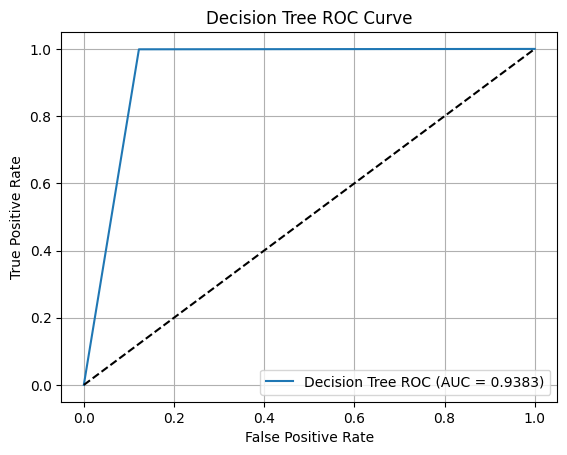

In [ ]:
# Evaluation metrics
dt_accuracy = accuracy_score(y_test, dt_prediction)
dt_precision = precision_score(y_test, dt_prediction)
dt_recall = recall_score(y_test, dt_prediction)
dt_f1 = f1_score(y_test, dt_prediction)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, dt_prediction)

# ROC Curve & AUC
dt_proba = dt_model.predict_proba(x_test)[:, 1]  # use model + same test set
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_proba)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Print Metrics
print("\nDecision Tree Metrics:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1:.4f}")
print("Confusion Matrix:")
print(cm_dt)
print(f"AUC: {roc_auc_dt:.4f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree ROC (AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

The Decision Tree model shows strong performance. It achieved an accuracy of 93.88% and a high AUC of 93.83%, indicating a good ability to distinguish between the two classes.

Precision (89.24%) : when the model predicts the positive class, it is correct about 89.01% of the time.

Recall (99.89%): meaning the model almost identifies all actual positive cases correctly.

The F1 Score (94.27%), which balances precision and recall, is also high, confirming good overall performance.

### Scatter Plot of Predicted vs. Actual Values for Binary Classification.


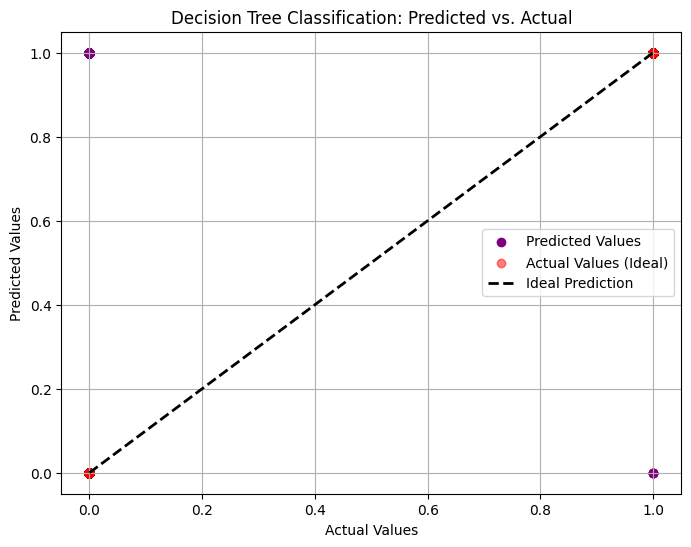

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_prediction, color='purple', label='Predicted Values')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual Values (Ideal)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Classification: Predicted vs. Actual')
plt.grid(True)
plt.legend()

# Add a diagonal line for ideal predictions
min_val = min(min(y_test), min(dt_prediction))
max_val = max(max(y_test), max(dt_prediction))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Ideal Prediction')
plt.legend()

plt.show()

### Scatter Plot to show the relationship between max_depth and Accuracy.

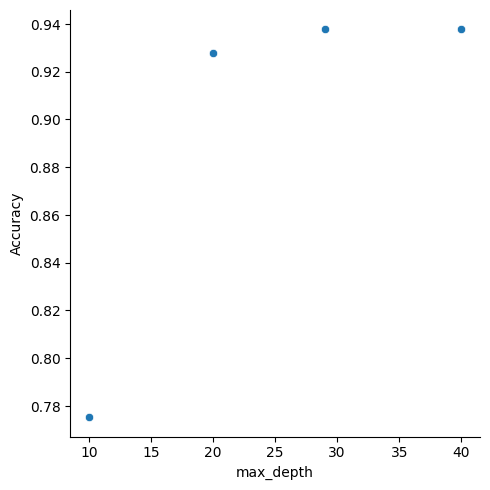

In [ ]:
# lists of max_depth values crossponding to its accuracy
max_depth_valuese = [10,20,29,40]
accuracy_scores = [0.7753 ,0.9278,  0.9378,0.9377]

# Creating a Pandas DataFrame
accuracy_df = pd.DataFrame({'max_depth': max_depth_valuese, 'Accuracy': accuracy_scores})

# use the accuracy_df DataFrame with sns.relplot()
sns.relplot(x="max_depth", y="Accuracy", data=accuracy_df, kind="scatter");

##**SVM**

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_scaled, y_train)

#note: no need to run this cell again
#output: SVC(C=1, gamma=1)

In [ ]:
# Train the SVM model with RBF kernel
# using probability=True to to compute ROC/AUC.
svm_model = SVC(kernel='rbf', gamma=1, C=1, probability=True)
svm_model.fit(X_train_scaled, y_train)

# Predict
svm_pred = svm_model.predict(X_test_scaled)

### Evaluation of Model Performance


SVM Metrics:
Accuracy: 0.9994
Precision: 1.0000
Recall: 0.9989
F1 Score: 0.9994
Confusion Matrix:
[[3519    0]
 [   4 3568]]
AUC: 0.9999


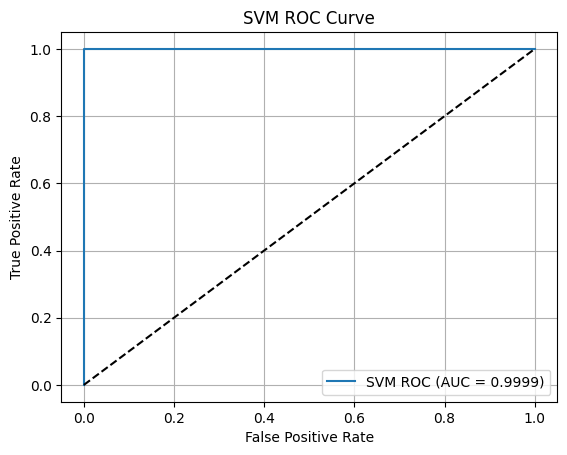

In [ ]:
# Result with Hyperparameter tuning
# Evaluation metrics
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

# Confusion Matrix
cm_svm = confusion_matrix(y_test, svm_pred)

# ROC Curve & AUC
svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_proba)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Print Metrics
print("\nSVM Metrics:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1 Score: {svm_f1:.4f}")
print("Confusion Matrix:")
print(cm_svm)
print(f"AUC: {roc_auc_svm:.4f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, label=f'SVM ROC (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

The SVM model demonstrates exceptionally high performance across all metrics. It achieved an accuracy of 99.94% and an outstanding AUC of 99.99%, indicating a near-perfect ability to distinguish between the two classes.

Precision (100.00%): meaning that every time the model predicts the positive class, it is absolutely correct.

Recall (99.89%): indicating that the model correctly identifies almost all of the actual positive cases.

The F1 Score (99.94%) also reflects this near-perfect performance.

### Scatter Plot of Predicted vs. Actual Values for Binary Classification.

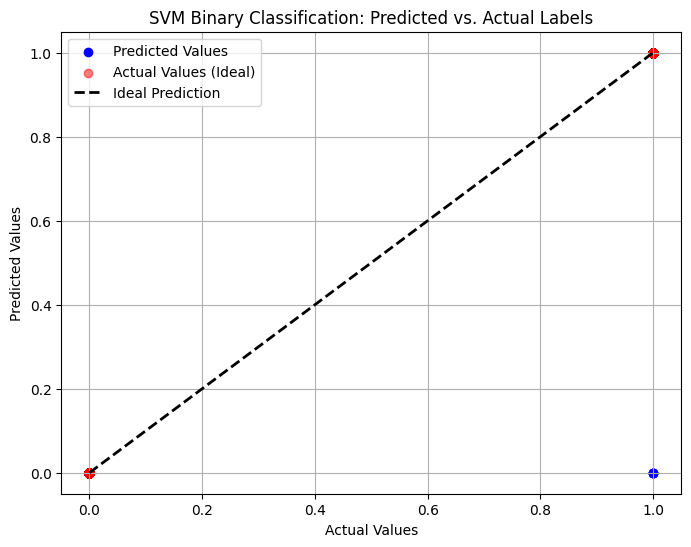

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svm_pred, color='blue', label='Predicted Values')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual Values (Ideal)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM Binary Classification: Predicted vs. Actual Labels')
plt.grid(True)
plt.legend()

# Add a diagonal line for ideal predictions
min_val = min(min(y_test), min(svm_pred))
max_val = max(max(y_test), max(svm_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Ideal Prediction')
plt.legend()

plt.show()

# **plot the confusion matrix**

for understanding class-specific performance and identifying biases.

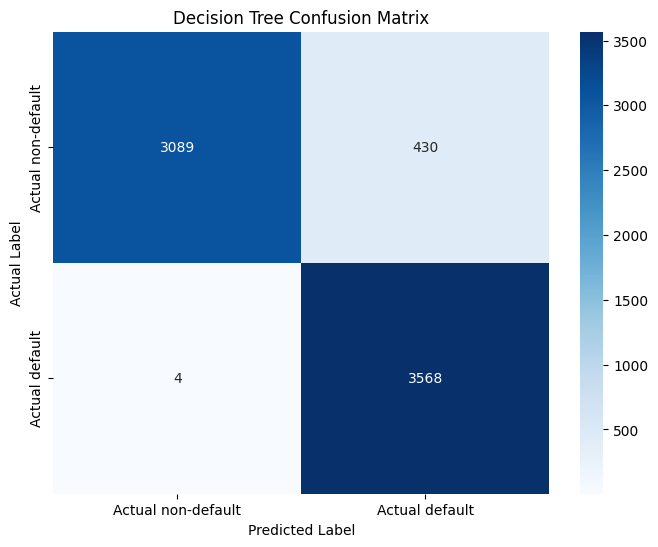

In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names, title='Confusion Matrix', cmap='Blues'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

class_names = ['Actual non-default', 'Actual default']

# For Decision Tree
plot_confusion_matrix(y_test, dt_prediction, class_names, title='Decision Tree Confusion Matrix')


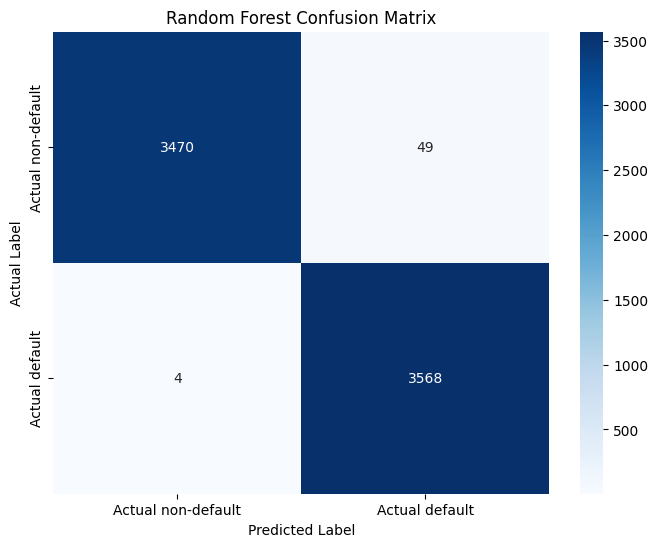

In [ ]:
# For Random Forest
plot_confusion_matrix(y_test, prediction, class_names, title='Random Forest Confusion Matrix')

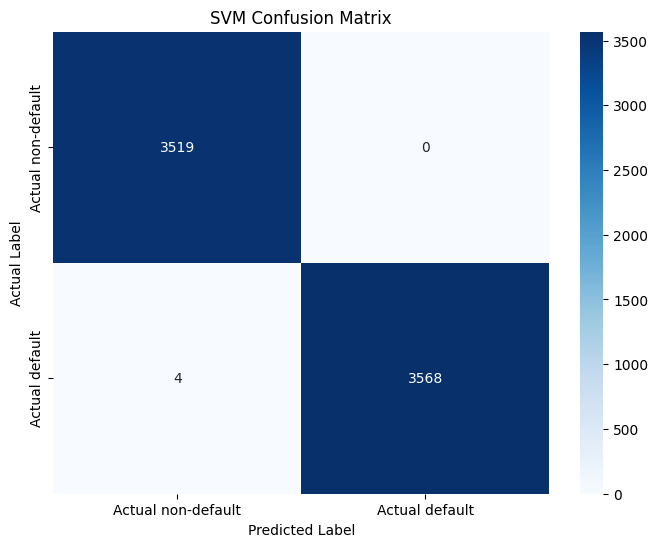

In [ ]:
# For SVM
plot_confusion_matrix(y_test, svm_pred, class_names, title='SVM Confusion Matrix')

# **Learning Curves plot for diagnosing Overfitting and Underfitting**

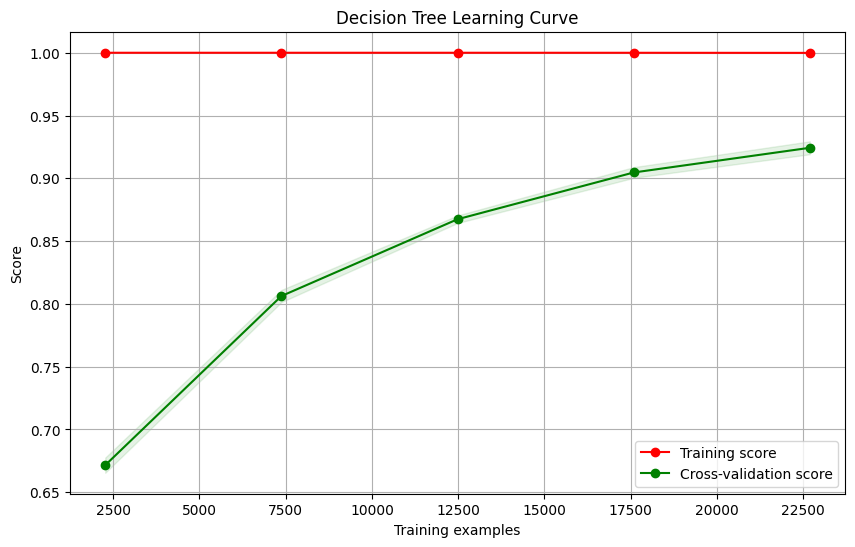

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,
                       scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.legend(loc="best")

    return plt

from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# For Decision Tree
plot_learning_curve(dt_model, "Decision Tree Learning Curve", x_train, y_train, cv=cv, scoring='accuracy')
plt.show()


The Decision Tree Learning Curve plot shows that the Decision Tree model is likely **overfitting**. It performs very well on the data it has seen during training but doesn't generalize as well to unseen data (as indicated by the lower cross-validation score and the gap between the two curves).

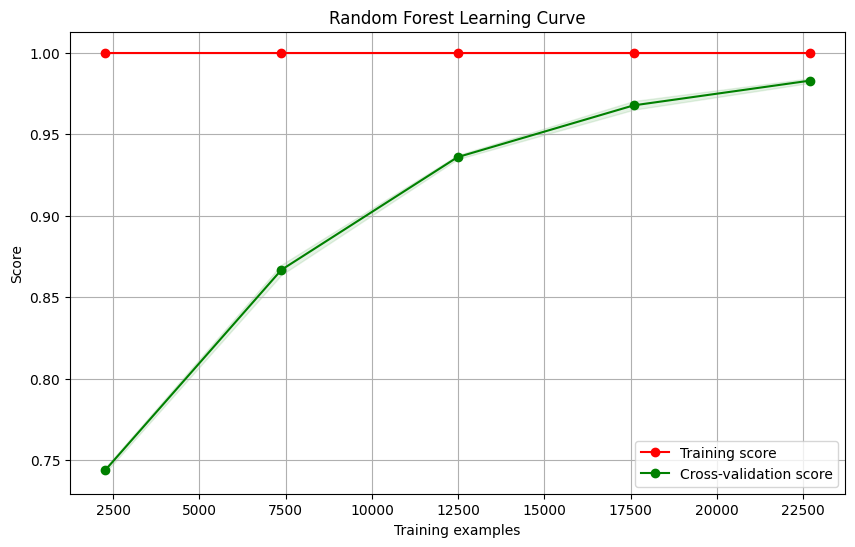

In [ ]:
# For Random Forest
plot_learning_curve(model, "Random Forest Learning Curve", x_train, y_train, cv=cv, scoring='accuracy')
plt.show()

The Random Forest Learning Curve plot shows that: while not perfect, the Random Forest model is likely **a better choice for generalization** than the single decision tree. It has managed to reduce overfitting and achieve a higher level of performance on unseen data.


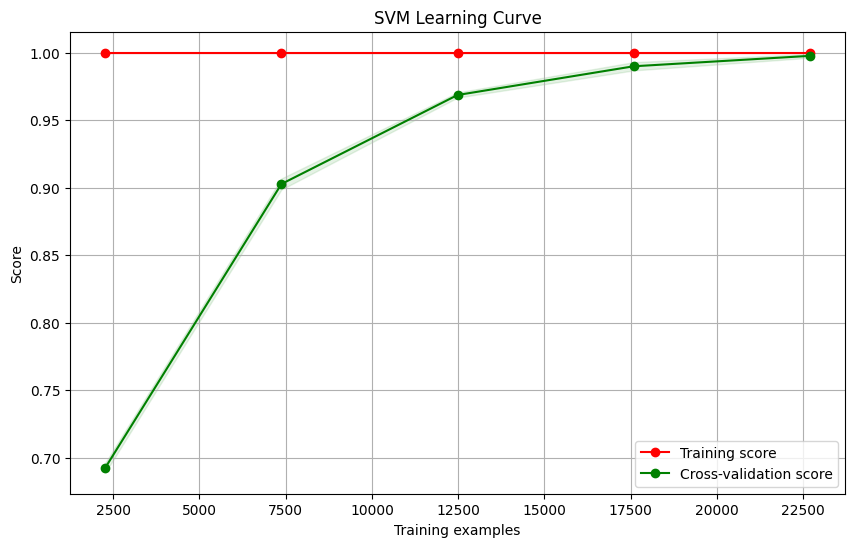

In [ ]:
plot_learning_curve(svm_model, "SVM Learning Curve", X_train_scaled, y_train, cv=cv, scoring='accuracy')
plt.show()

The SVM learning curve indicates **good generalization**. It performs much better than the decision tree (smaller gap between training and validation scores) and is comparable to or slightly better than the Random Forest in generalizing to unseen data. The model learns effectively and benefits from more training data.

# **the effect of using the RBF kernel in SVM**


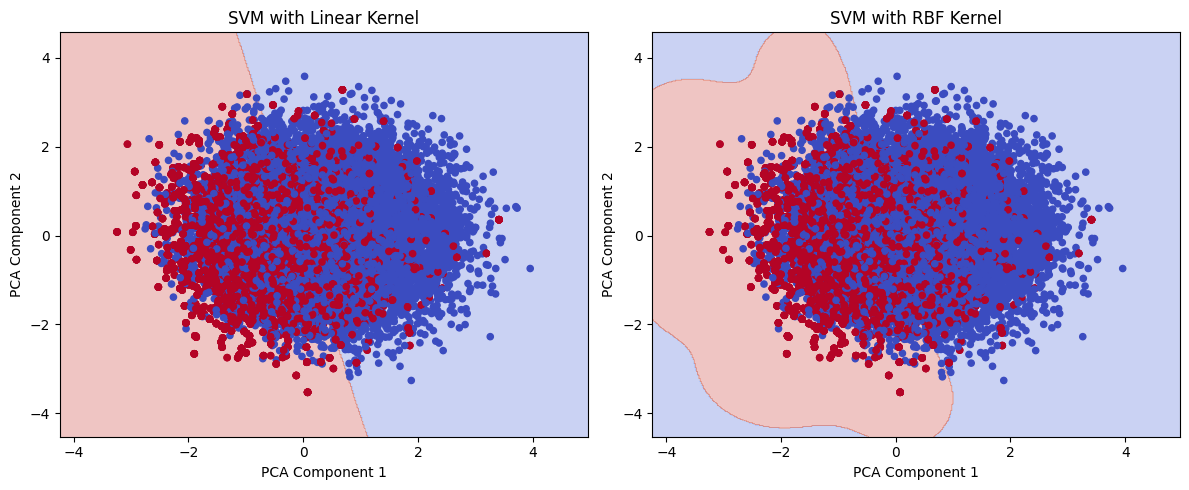

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np


# Reduce scaled features to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Train SVMs (just for visualization)
svm_rbf = SVC(kernel='rbf', gamma=1, C=1)
svm_rbf.fit(X_train_pca, y_train)

svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_pca, y_train)

# Create meshgrid
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot
plt.figure(figsize=(12, 5))

for i, (clf, title) in enumerate([
    (svm_linear, 'SVM with Linear Kernel'),
    (svm_rbf, 'SVM with RBF Kernel')
]):
    plt.subplot(1, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
                c=y_train, cmap=plt.cm.coolwarm, s=20)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

**Comparison of Linear and RBF Kernels in SVM:**

The Linear SVM creates a simple, straight boundary, which struggles with complex, non-linear data. In contrast, the RBF kernel provides a flexible and accurate separation, making it better for overlapping or intricate data. Adjusting the RBF’s gamma shows that low values give smoother, more general boundaries, while high values risk overfitting. This supports using the RBF kernel and highlights the importance of tuning hyperparameters for best results.